In [1]:
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
!unzip /content/Maintenance.zip

Archive:  /content/Maintenance.zip
replace predictive_maintenance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: predictive_maintenance.csv  


In [5]:
Data = pd.read_csv("predictive_maintenance.csv")

In [6]:
Data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [22]:
Target_counts = Data['Target'].value_counts()
print(Target_counts)
Type_counts = Data['Type'].value_counts()
print(Type_counts)

0    9661
1     339
Name: Target, dtype: int64
L    6000
M    2997
H    1003
Name: Type, dtype: int64


In [13]:
Data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [14]:
print("Number of NaN data is: ",Data.isna().sum().sum())

Number of NaN data is:  0


In [15]:
Data = Data.drop(columns="Failure Type")
Data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0


In [24]:
X = Data.drop(columns = ["Target","Product ID"])
X.head(10)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,M,298.1,308.6,1551,42.8,0
1,2,L,298.2,308.7,1408,46.3,3
2,3,L,298.1,308.5,1498,49.4,5
3,4,L,298.2,308.6,1433,39.5,7
4,5,L,298.2,308.7,1408,40.0,9
5,6,M,298.1,308.6,1425,41.9,11
6,7,L,298.1,308.6,1558,42.4,14
7,8,L,298.1,308.6,1527,40.2,16
8,9,M,298.3,308.7,1667,28.6,18
9,10,M,298.5,309.0,1741,28.0,21


In [35]:
for i in range(len(Y)):
  if X.loc[i,"Type"] == "L": 
    X.loc[i,"Type"] = 0
  if X.loc[i,"Type"] == "M": 
    X.loc[i,"Type"] = 1
  if X.loc[i,"Type"] == "H": 
    X.loc[i,"Type"] = 2
X.head(10)

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,1,298.1,308.6,1551,42.8,0
1,2,0,298.2,308.7,1408,46.3,3
2,3,0,298.1,308.5,1498,49.4,5
3,4,0,298.2,308.6,1433,39.5,7
4,5,0,298.2,308.7,1408,40.0,9
5,6,1,298.1,308.6,1425,41.9,11
6,7,0,298.1,308.6,1558,42.4,14
7,8,0,298.1,308.6,1527,40.2,16
8,9,1,298.3,308.7,1667,28.6,18
9,10,1,298.5,309.0,1741,28.0,21


In [19]:
Y = Data.Target
Y.head(10)  #0 for no failure and 1 for failure

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Target, dtype: int64

In [36]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2)

## Data Visualisation

In [47]:
DF = pd.concat([X, Y], axis=1)

In [48]:
sample = DF.sample(frac=0.1)
sample.head()

,UDI,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
6517,6518,0,301.1,310.1,1540,36.6,28,0
1175,1176,1,297.2,308.3,1578,37.8,3,0
6012,6013,2,300.8,310.9,1425,44.0,33,0
3967,3968,1,302.3,311.4,1479,45.6,59,0
3618,3619,0,301.9,311.1,1448,46.3,14,0


In [49]:
sample.shape

(1000, 8)

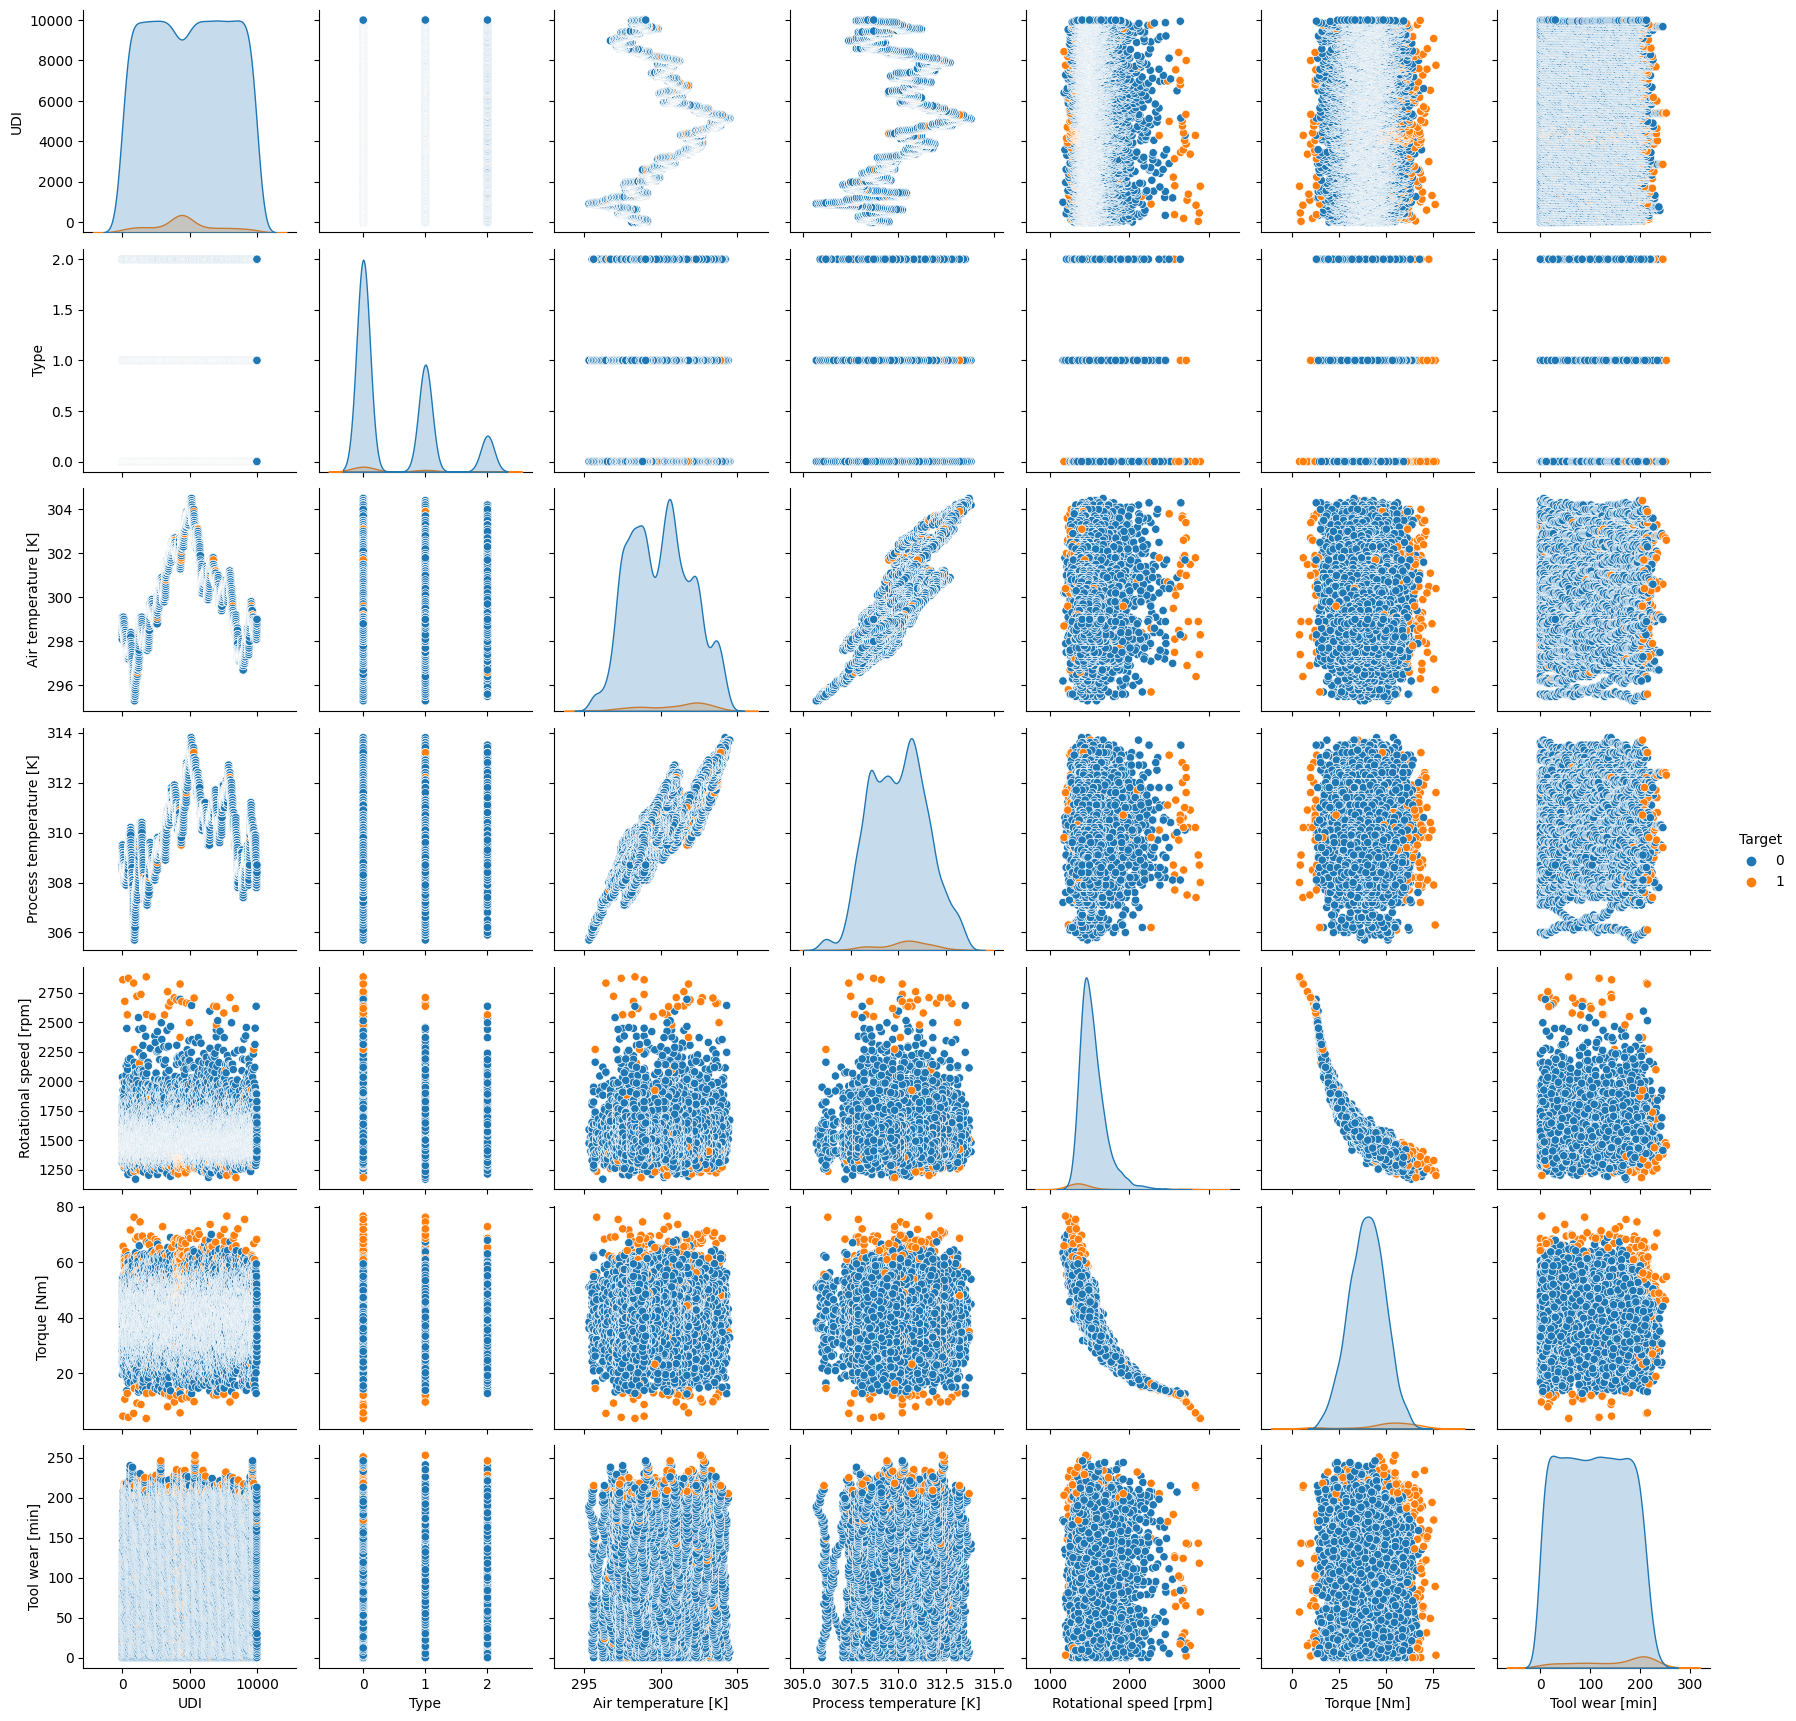

In [50]:
sns.pairplot(DF,hue="Target")

<ipython-input-51-ce6a59d22414>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sample.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

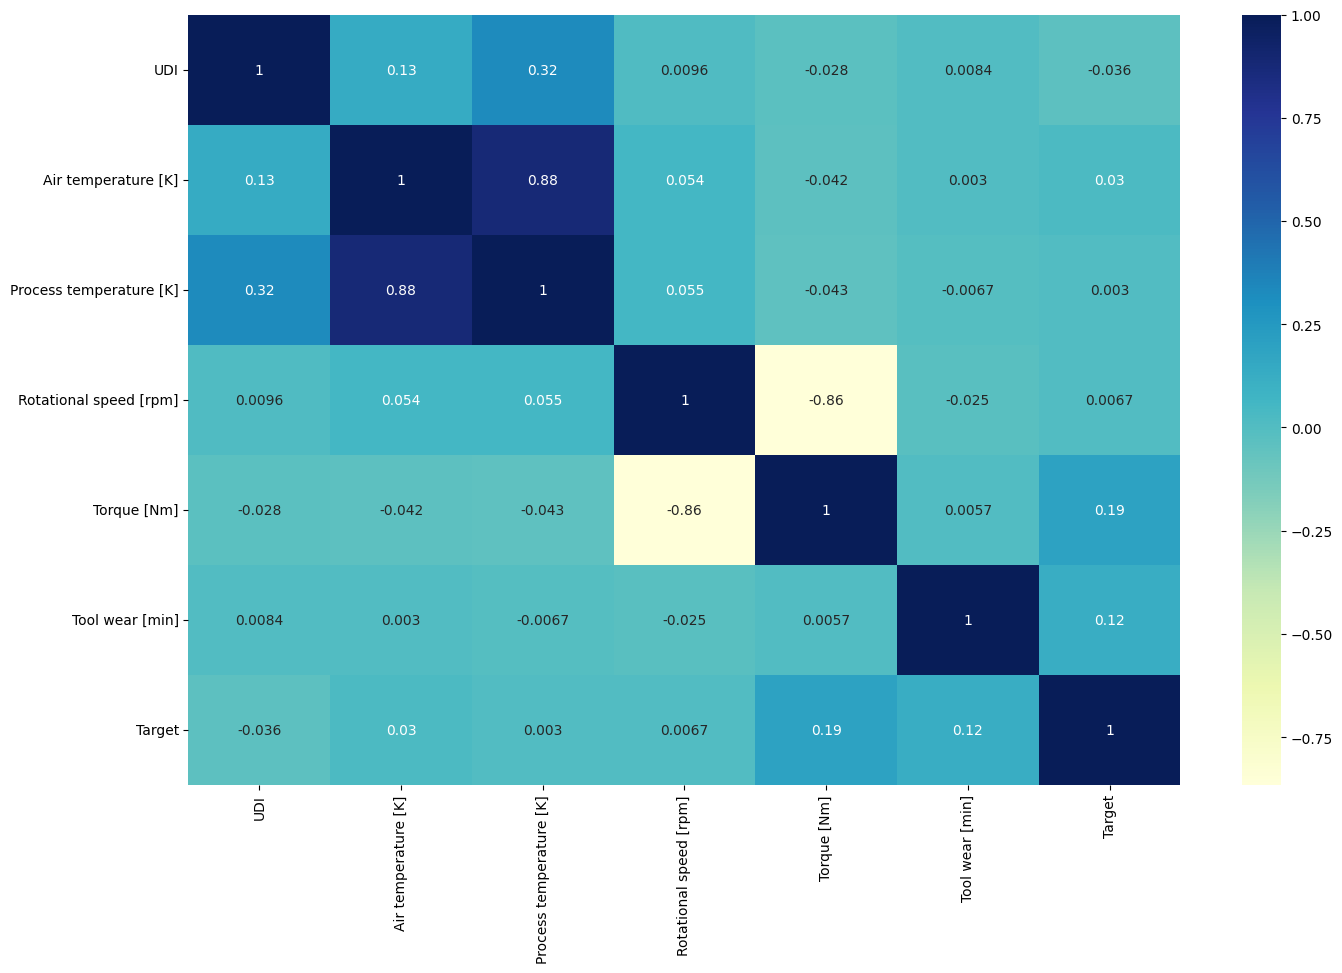

In [51]:
plt.figure(figsize=(16,10))
sns.heatmap(sample.corr(), annot = True, cmap = "YlGnBu") 

# We will solve =the prediction problem of maitenance of industrial system with multiple ML algorithms, and compare all these algorithms.
Check this link for data source : 
https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

#Logistic Regression

In [52]:
Model = LogisticRegression()

In [53]:
Model.fit(X_train,Y_train)

LogisticRegression()

In [54]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.968


# Decision Tree

In [55]:
Model = DecisionTreeClassifier()

In [56]:
Model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [57]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9845


# Random Forest 

In [58]:
Model = RandomForestClassifier()

In [59]:
Model.fit(X_train,Y_train)

RandomForestClassifier()

In [60]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9845


# KNN

In [61]:
Model = KNeighborsClassifier()

In [62]:
Model.fit(X_train,Y_train)

KNeighborsClassifier()

In [63]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.974


In [64]:
score_list = []
for i in range(100):  
  KNN = KNeighborsClassifier(n_neighbors=i+1)
  KNN.fit(X_train,Y_train)
  S = KNN.score(X_test,Y_test)
  score_list.append(S)

In [65]:
print(score_list)

[0.9675, 0.975, 0.978, 0.9745, 0.974, 0.973, 0.973, 0.973, 0.9735, 0.9725, 0.9735, 0.974, 0.974, 0.974, 0.974, 0.9745, 0.976, 0.975, 0.9765, 0.974, 0.975, 0.9735, 0.976, 0.9725, 0.9735, 0.973, 0.973, 0.9725, 0.9735, 0.973, 0.9735, 0.9725, 0.9735, 0.9715, 0.973, 0.971, 0.9715, 0.9695, 0.9705, 0.9685, 0.9685, 0.9685, 0.969, 0.9685, 0.9685, 0.9685, 0.9685, 0.9685, 0.9685, 0.9675, 0.9675, 0.9675, 0.9675, 0.9675, 0.9675, 0.967, 0.967, 0.967, 0.967, 0.967, 0.967, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665, 0.9665]


In [66]:
print("Maximum accuracy: ",max(score_list), "with K equal: ",score_list.index(max(score_list))+1)

Maximum accuracy:  0.978 with K equal:  3


In [67]:
Model = KNeighborsClassifier(n_neighbors=score_list.index(max(score_list))+1)
Model.fit(X_train,Y_train)
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.978


# Naive Bayes Classifier

In [68]:
model = GaussianNB()

In [69]:
Model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.978


 # Support Vector Machine 

In [71]:
# Linear kernel 
Model = SVC(kernel = 'linear')

In [72]:
Model.fit(X_train,Y_train)

SVC(kernel='linear')

In [73]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9675


In [74]:
# Polynomial kernel
Model = SVC(kernel = 'poly')

In [75]:
Model.fit(X_train,Y_train)

SVC(kernel='poly')

In [76]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9665


In [77]:
#Radial basis function kernel
Model = SVC(kernel = 'rbf')

In [78]:
Model.fit(X_train,Y_train)

SVC()

In [79]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.9665


In [80]:
#Sigmoid Kernel
Model = SVC(kernel = 'sigmoid')

In [81]:
Model.fit(X_train,Y_train)

SVC(kernel='sigmoid')

In [82]:
Y_pred = Model.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.953
